<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team1/blob/master/Week7/miseongkim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')
submission = pd.read_csv('submission.csv')

# 데이터 탐색

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


|제목|내용|
|--|--|
|title|영화제목|
|distributor|배급사|
|genre|장르|
|release_time|개봉일|
|time|상영시간(분)|
|screening_rat|상영등급|
|director|감독이름|
|dir_prev_bfnum|해당 감독이 이 영활 만들기 전 제작에 참여한 영화에서의 평균 관객수(관객수가 알려지지 않은 영화 제외)|
|dir_prev_num|해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)|
|num_staff|스텝수|
|num_actor|주연배우수|
|box_off_num|관객수|

In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
test.head() # 목표인 box_off_num은 없음

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


*이탤릭체 텍스트*-> dir_prev_bfnum 데이터를 어떻게 처리해야 할까 <br>
=> Null 값을 가진 감독들을 몇 명 조사해보니까 이전 작품들이 없는 감독들. <br>
=> 따라서 <b>모든 Null 값들을 0으로 </b> 처리해줘도 무방하다고 봄.

In [8]:
submission.head() #box_off_num을 예측

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [9]:
train.describe(include='all')

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600,600,600,600,600.000000,600,600,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
unique,600,169,12,330,NaN,4,472,NaN,NaN,NaN,NaN,NaN
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22,NaN,청소년 관람불가,홍상수,NaN,NaN,NaN,NaN,NaN
freq,1,54,221,6,NaN,204,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,100.863333,NaN,NaN,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,NaN,NaN,NaN,NaN,18.097528,NaN,NaN,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,89.000000,NaN,NaN,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,NaN,NaN,NaN,NaN,114.000000,NaN,NaN,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05


# 데이터 전처리

In [10]:
data = pd.DataFrame()

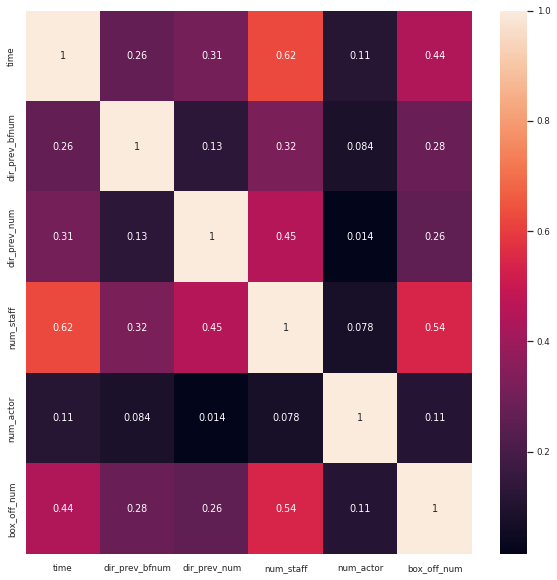

In [11]:
#각 피쳐들끼리의 상관 관계를 보기 위해 상관관계를 히트맵으로 출력
train_corr = train.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(train_corr, annot=True, cbar=True)
plt.show()

In [12]:
corr_order = train_corr.loc[:'num_actor', 'box_off_num'].abs().sort_values(ascending=False)
corr_order

num_staff         0.544265
time              0.441452
dir_prev_bfnum    0.283184
dir_prev_num      0.259674
num_actor         0.111179
Name: box_off_num, dtype: float64

=> box_off_num과 가장 관련이 높은 것 : num_staff, time, dir_prev_bfnum <br>
But... 상관계수가 그렇게 높지는 않음...
어쩌지 ???? <br>
-> 숫자형 데이터가 아닌 데이터들의 처리도 필요하다고 봄... (장르, 상영등급, 개봉일 등) <br>
(+ 주연배우수는 별로 안중요한듯)

### 각각의 피처들 확인

<b>title :</b> <br>
영화의 제목. 의미 없으므로 확인X <br>
<b>distributor : </b> <br>
배급사

In [13]:
train.distributor.describe() # 600개 O, 고유값은 169개 존재, 제일 많은 거는 CJ, 최빈값의 개수 : 54개

count           600
unique          169
top       CJ 엔터테인먼트
freq             54
Name: distributor, dtype: object

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_

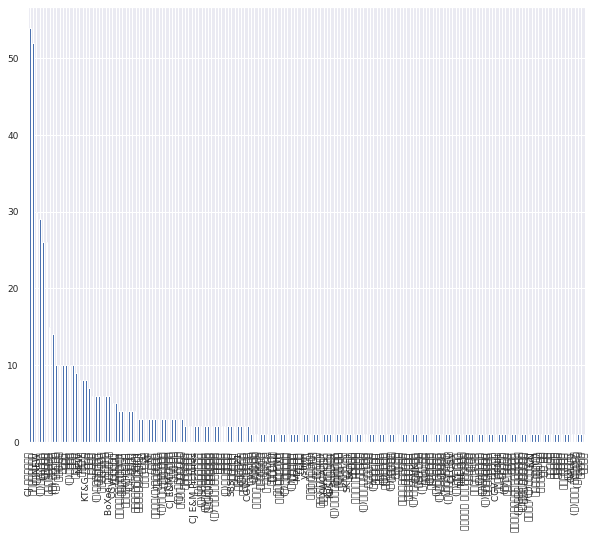

In [14]:
dis_plt = pd.value_counts(train['distributor'].values, sort=True)
dis_plt.plot.bar()
dis_plt.plot.bar(grid=True, figsize=(10, 8), fontsize=9)

표를 그리는 건 잘못된 선택인듯......<br>
그래도 상위 5개 배급사 제외하고 모두 '기타' 처리하는 건 과하다는 것을 알 수 있었음

In [15]:
# 상위 10개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:10]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [16]:
train[['distributor', 'box_off_num']].groupby('distributor').mean().sort_values('box_off_num')

,box_off_num
distributor,
(주) 케이알씨지,1.027286e+03
골든타이드픽처스,4.373200e+03
인디스토리,5.210577e+03
(주) 영화사조제,6.771800e+03
영화사 진진,9.600900e+03
(주)마운틴픽쳐스,3.234221e+04
기타,2.659727e+05
롯데엔터테인먼트,1.238149e+06
CJ 엔터테인먼트,2.162742e+06


배급사별로 관객 수 차이가 꽤 남 => 유의미한 피쳐 ??

<b> genre : </b> <br>
장르

In [17]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')
#groupby('genre') : genre에 대한 통계량 (여기선 mean값)

,box_off_num
genre,
뮤지컬,6.627000e+03
다큐멘터리,6.717226e+04
서스펜스,8.261100e+04
애니메이션,1.819267e+05
멜로/로맨스,4.259680e+05
미스터리,5.275482e+05
공포,5.908325e+05
드라마,6.256898e+05
코미디,1.193914e+06


느와르, 액션, SF, 코미디 장르... 순으로 인기가 많다는 걸 알 수 있음! <br>
-> <b>장르도 중요한 피처다!!</b>

<b> release_time : </b> <br>
개봉일

In [18]:
# 개봉일을 바탕으로 년,월 변수 생성
train['Year'] = train['release_time'].apply(lambda x: int(x[:4]))
train['Month'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['Year'] = test['release_time'].apply(lambda x: int(x[:4]))
test['Month'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)


In [19]:
train.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,Year,Month
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7
4,불량남녀,기타,코미디,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11


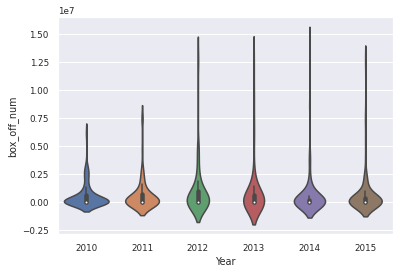

In [20]:
sns.violinplot(x='Year', y='box_off_num', data=train)
plt.show()

In [21]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,Year,Month
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452,-0.062575,-0.023969
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184,-0.002137,0.064117
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674,0.132621,0.034019
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265,-0.032891,-0.002841
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179,-0.098869,-0.015063
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000,-0.002497,0.019104
Year,-0.062575,-0.002137,0.132621,-0.032891,-0.098869,-0.002497,1.000000,0.046627
Month,-0.023969,0.064117,0.034019,-0.002841,-0.015063,0.019104,0.046627,1.000000


=> Year과 Month는 진짜 1도 상관 없다...

<b> time : </b> <br>
상영시간(분)

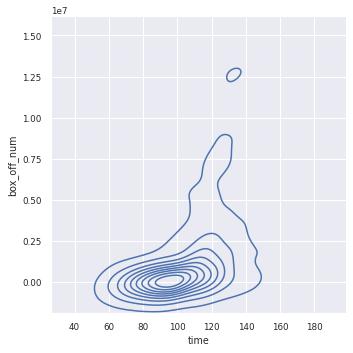

In [22]:
sns.displot(x='time', kind='kde', y='box_off_num', data=train)

=> 보통 관객수가 많은 영화는 120분~140분? =>유의미한 피쳐라 판단됨

<b> screening_rat : </b> <br>
상영등급

In [23]:
train[['screening_rat', 'box_off_num']].groupby('screening_rat').mean().sort_values('box_off_num')

,box_off_num
screening_rat,
전체 관람가,1.351005e+05
청소년 관람불가,3.641813e+05
12세 관람가,8.449809e+05
15세 관람가,1.247519e+06


15세가 가장 많고, 그 다음 12세, 등등...인데 약 10배정도 차이남. => 의미 있는지 없는지 애매하다 판단

<b> director : </b> <br>
감독이름 (별 의미 없을 것 같아 X)

In [24]:
train[['director', 'box_off_num']].sort_values('box_off_num')

,director,box_off_num
432,노성수,1
324,김정호,2
338,고구마,8
410,이세일,10
481,진광교,36
...,...,...
460,추창민,12323595
498,최동훈,12706663
530,이환경,12811435
362,최동훈,12983841


<b> dir_prev_bfnum : </b> <br>
해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객 수 (단 관객수가 알려지지 않은 영화 제외)

In [25]:
train = train.fillna(0) # 결측치 0으로 채움
test = test.fillna(0) #test파일에도 결측치 존재. 이것도 0으로 채워 줌

In [26]:
train.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,Year,Month
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7
4,불량남녀,기타,코미디,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11


<b> dir_prev_num : </b> <br>
해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수 (단 관객수가 알려지지 않은 영화 제외) <br>
-> 제일 처음에 dir_prev_num      0.259674 으로 상관계수가 높다고 보기 어려움. 또한, 감독별로 모든 histogram을 보기는 힘들다고 판단함.

<b> num_staff : </b> <br>
스탭수

(<seaborn.axisgrid.FacetGrid at 0x7f22eb1a5090>,)

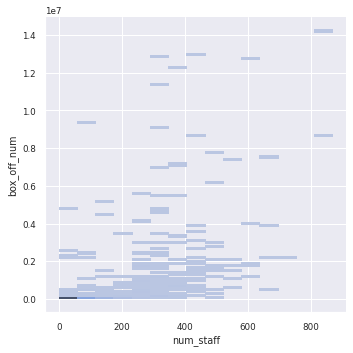

In [27]:
sns.displot(x='num_staff', kind='hist', y = 'box_off_num', data=train),

<b> num_actor :  </b>  <br>
주연배우수

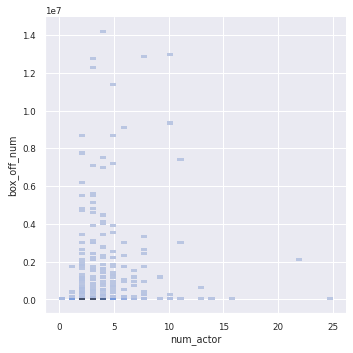

In [28]:
sns.displot(x='num_actor', kind='hist', y='box_off_num', data=train)

### 피처 선택

In [29]:
selected_features = ['']